# Cluster Lensing Dipole in CMB Maps

The CMB arrives at us from every direction, constituting a diffuse source field which covers the entire sky. Due to the effect of gravitational lensing, CMB photons get continuously deflected by the matter distribution between the last scattering surface and the observer, leading to a redistribution of the CMB temperature and polarization fields, denoted as $X$. Thus, the lensed CMB field $\tilde{X}$ will have a different fluctuation pattern which is given by a surface brightness conserving remapping of the unlensed field:


$$
    \tilde{X}(\boldsymbol{\theta}) = X(\boldsymbol{\beta}) =   X(\boldsymbol{\theta} - \boldsymbol{\alpha}(\boldsymbol{\theta})) \;, 
    \label{eq:cmb_lensing}
$$

where $\boldsymbol{\theta}$ denotes the line-of-sight direction and $\boldsymbol{\alpha}$ the total deflection angle due to the mass distribution between the CMB and the observer. 
When considering CMB lensing by galaxy clusters, only scales of a few arcminutes are of interest, corresponding to the angular size of a galaxy cluster and to the amplitude of the produced deflection angle. On these scales, the unlensed CMB is very smooth due to Silk damping and is well described by a constant gradient field. The lensed CMB field can therefore be approximated by a first order Taylor expansion:


$$
 \tilde{X}(\boldsymbol{\theta})  \approx    X(\boldsymbol{\theta})-\boldsymbol{\alpha}(\boldsymbol{\theta})\nabla X(\boldsymbol{\theta}) \;,
$$


which is known as the gradient approximation. The first term on the right-hand side refers to the CMB field in the absence of lensing. The second term describes the lensing effect, mostly due to lensing along the line-of-sight by the cluster, while some small part is due to lensing by the cluster uncorrelated large-scale structure. The cluster deflects the CMB photons radially, making them appear to originate further from its center. Thus, the hot side of the gradient will look colder after lensing while the cold side will look hotter. This induces a dipole shaped signature in the CMB in a direction aligned with the background gradient. As, for a given cluster mass, the dipole signal depends linearly on the magnitude of the gradient, the highest SNR is obtained for clusters in front of a significant CMB background gradient. Since the root-mean-square temperature gradient is $ \sim 10\text{ }\mu\text{K}/\text{arcmin}$ and clusters can produce deflections of $\sim 1$ arcmin, the lensing signal in CMB temperature maps will be at the $\sim 10\text{ }\mu$K level. 

In [1]:
### importing relevant modules ###
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
sz_ft = 16
sz_lb = 16
from cosmo import CosmoCalc
import cosmo
import sims
import tools
import lensing

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


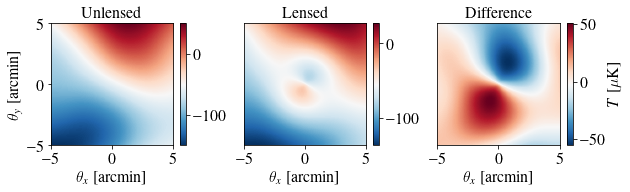

In [2]:
### settings used for generatting a cluster (un)lensed CMB map ###
map_params = [600, 0.1, 600, 0.1]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster = [9e15, cosmo.concentration_parameter(1e15, 1, 0.674), 1]
kappa_map = lensing.NFW(cluster[0], cluster[1], cluster[2], 1100).convergence_map(map_params)
alpha_vec = lensing.deflection_from_convergence(map_params, kappa_map)


### computing the unlensed, cluster-lensed, and dipole map ###
cmb_unlensed = tools.make_gaussian_realization(map_params, l, cl)
cmb_lensed = lensing.lens_map(map_params, cmb_unlensed, alpha_vec) 
dipole = cmb_lensed - cmb_unlensed
maps = [cmb_unlensed, cmb_lensed, dipole]


### plotting the central (10'X10') region of each map to show the dipole ###
_, extent = tools.make_grid([100, 0.1, 100, 0.1])
fig, ax_arr = plt.subplots(1,3, figsize=(9,9))
titles = ['Unlensed', 'Lensed', 'Difference']
for i, ax in enumerate(ax_arr):
    im = ax.imshow(maps[i][250:350, 250:350], extent = extent, cmap = cm.RdBu_r)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = fig.colorbar(im, cax = cax)
    cb.ax.tick_params(labelsize=sz_lb)
    ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
    if i == 0:
        ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
    else:
        ax.get_yaxis().set_visible(False)
    ax.set_title(titles[i], fontsize = sz_ft)
    ax.tick_params(labelsize = sz_lb)
cb.set_label(label=r'$T \ [\mu$'+'K]', size=sz_ft)

fig.tight_layout(pad=1)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cmb_cluster_lensing.eps', dpi = 200, bbox_inches = 'tight')

After subtracting the cluster-lensed from the unlensed map, the cluster lensing dipole signal can be extracted. Note that one can not see the lensing signal in the lensed map in real observations due to lower cluster masses and map noise. The dipole signal of an individual cluster can never be extracted using real observations since it is impossible to observe the unlensed CMB behind the cluster.